In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import os

groups = ["control", "PD-1", "LTBR", "PD1+LTBR"]
sample_number = [5, 5, 4, 5]
filepath = "/Users/yuey2/Desktop/cell count/demo.xlsx"  # The path to your excel file
dirname = os.path.dirname(filepath)  
data = pd.read_excel(filepath, index_col=0) 
cell_type = data.columns[:]

In [2]:
data['Group'] = ''
start = 0
for group, size in zip(groups, sample_number):
    end = start + size
    data['Group'][start:end] = group
    start = end

/var/folders/56/k3j8nxjs0yb5sl_rjhv3gggh0000gn/T/ipykernel_90877/1735301749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Group'][start:end] = group


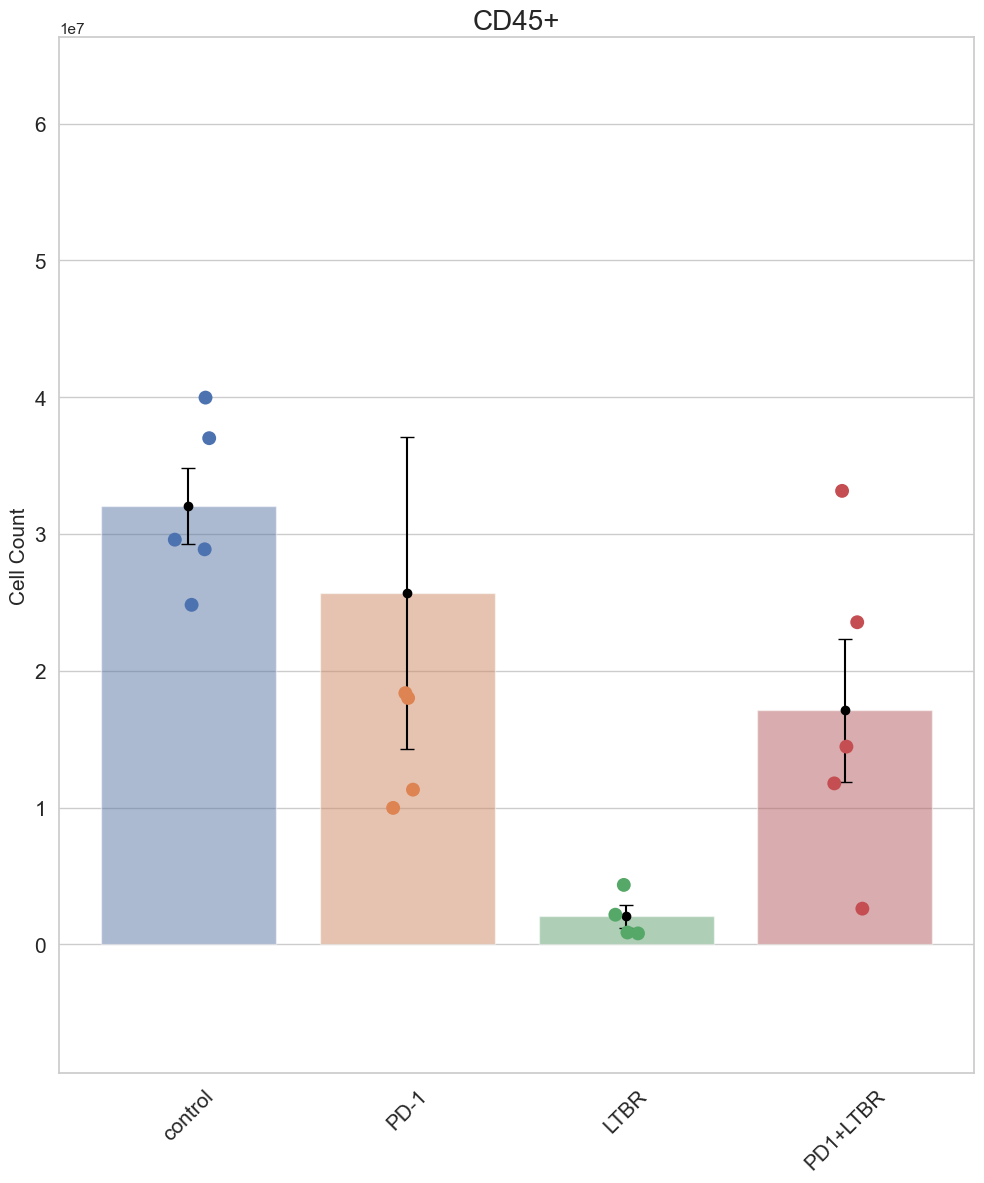

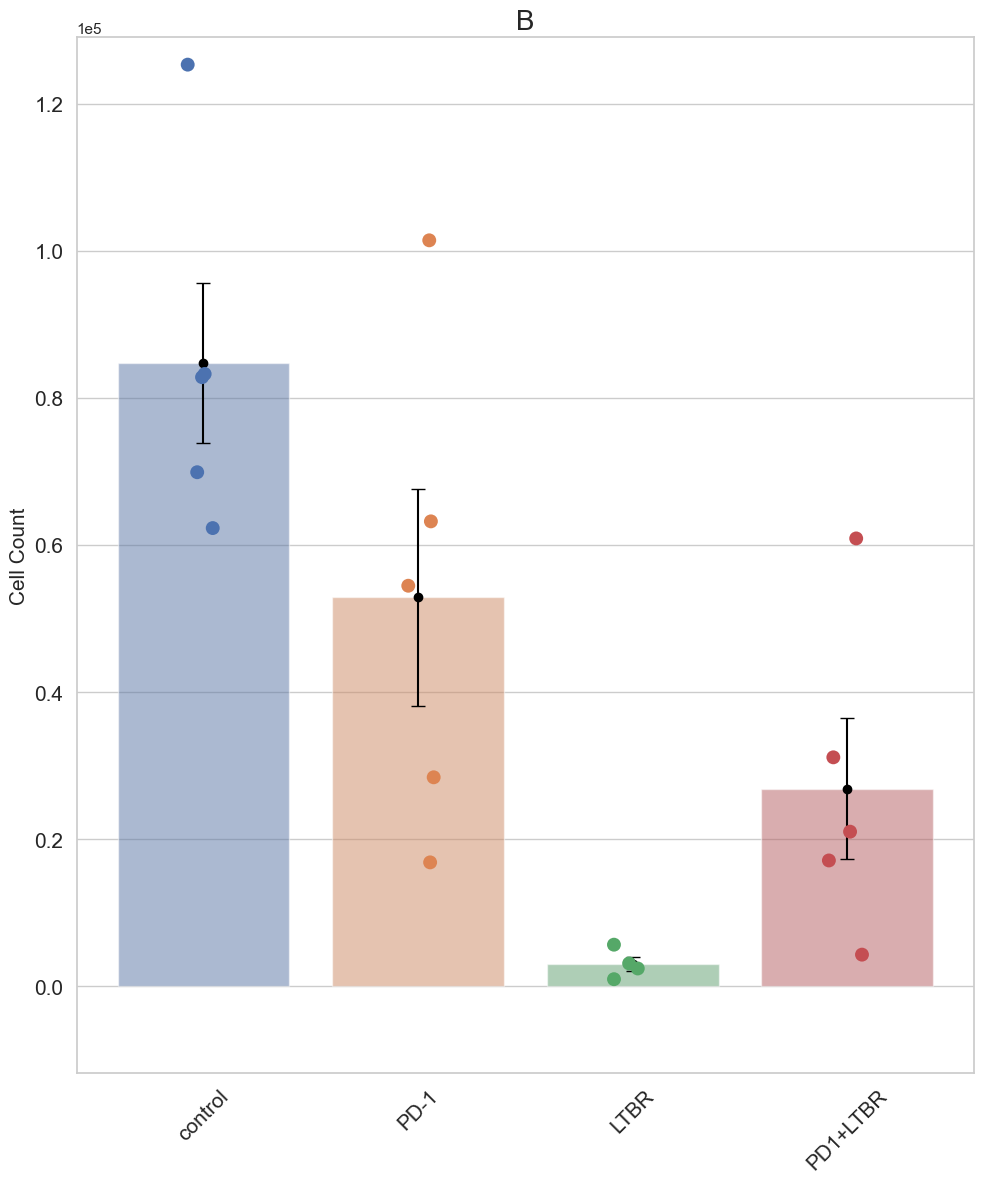

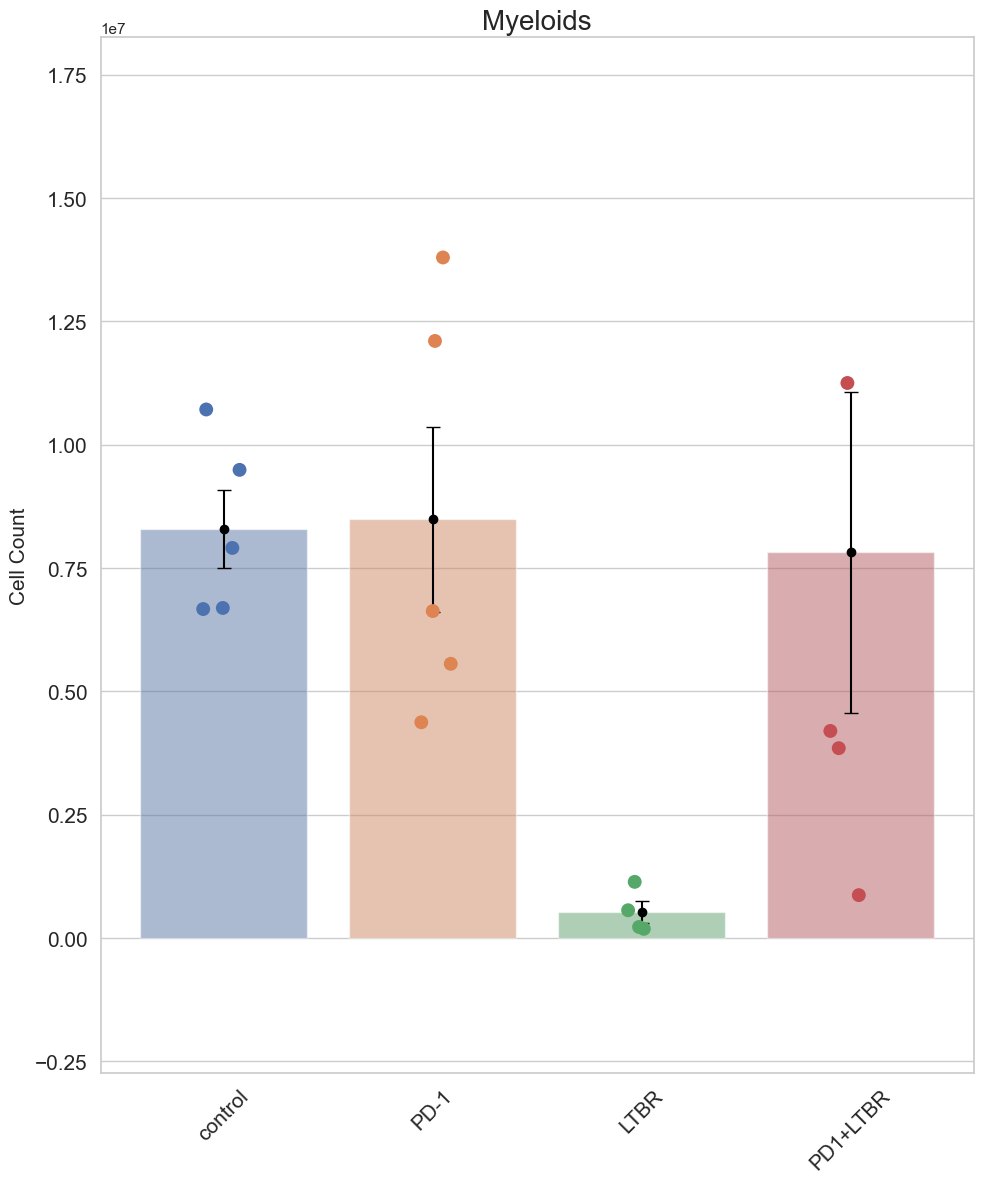

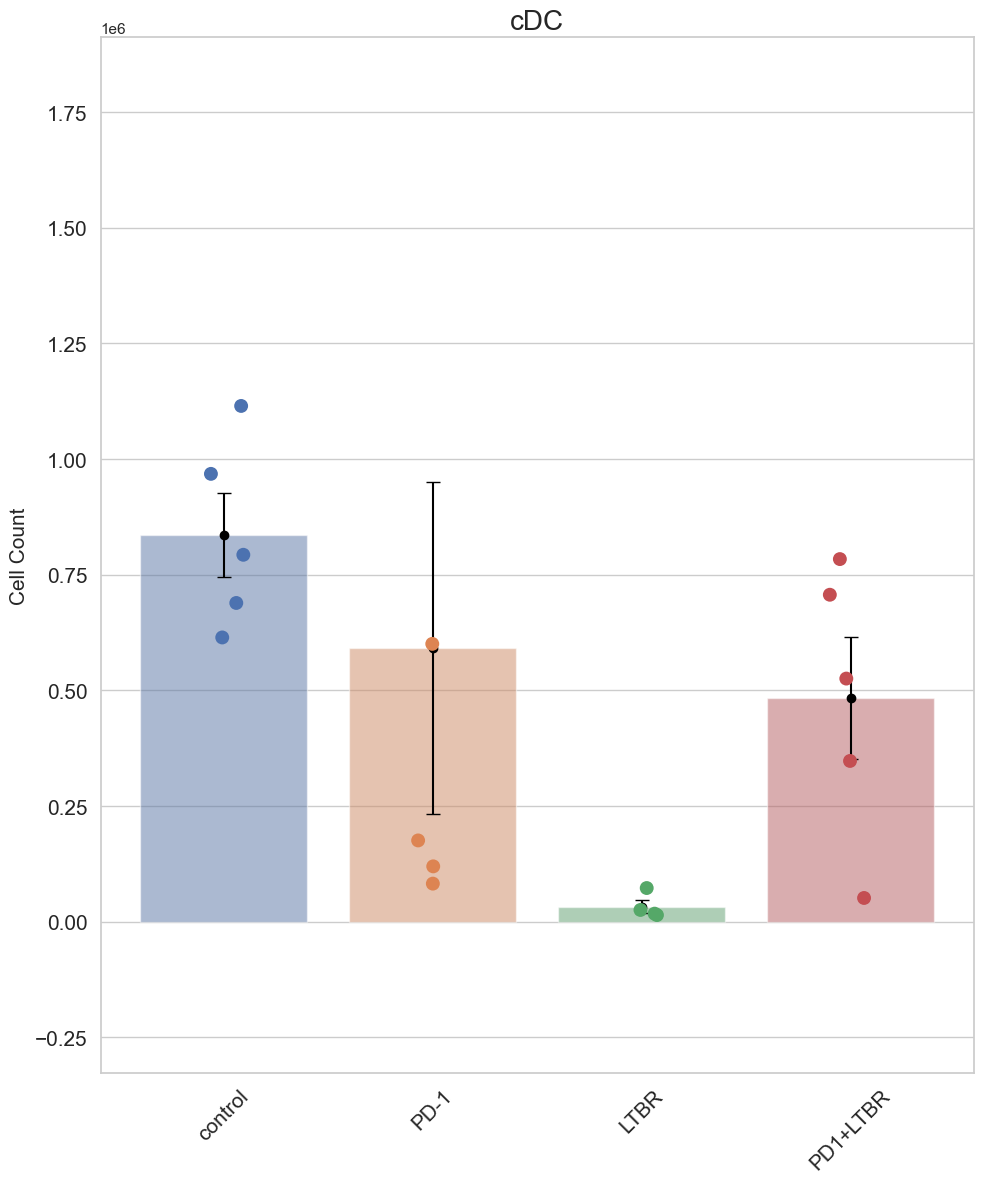

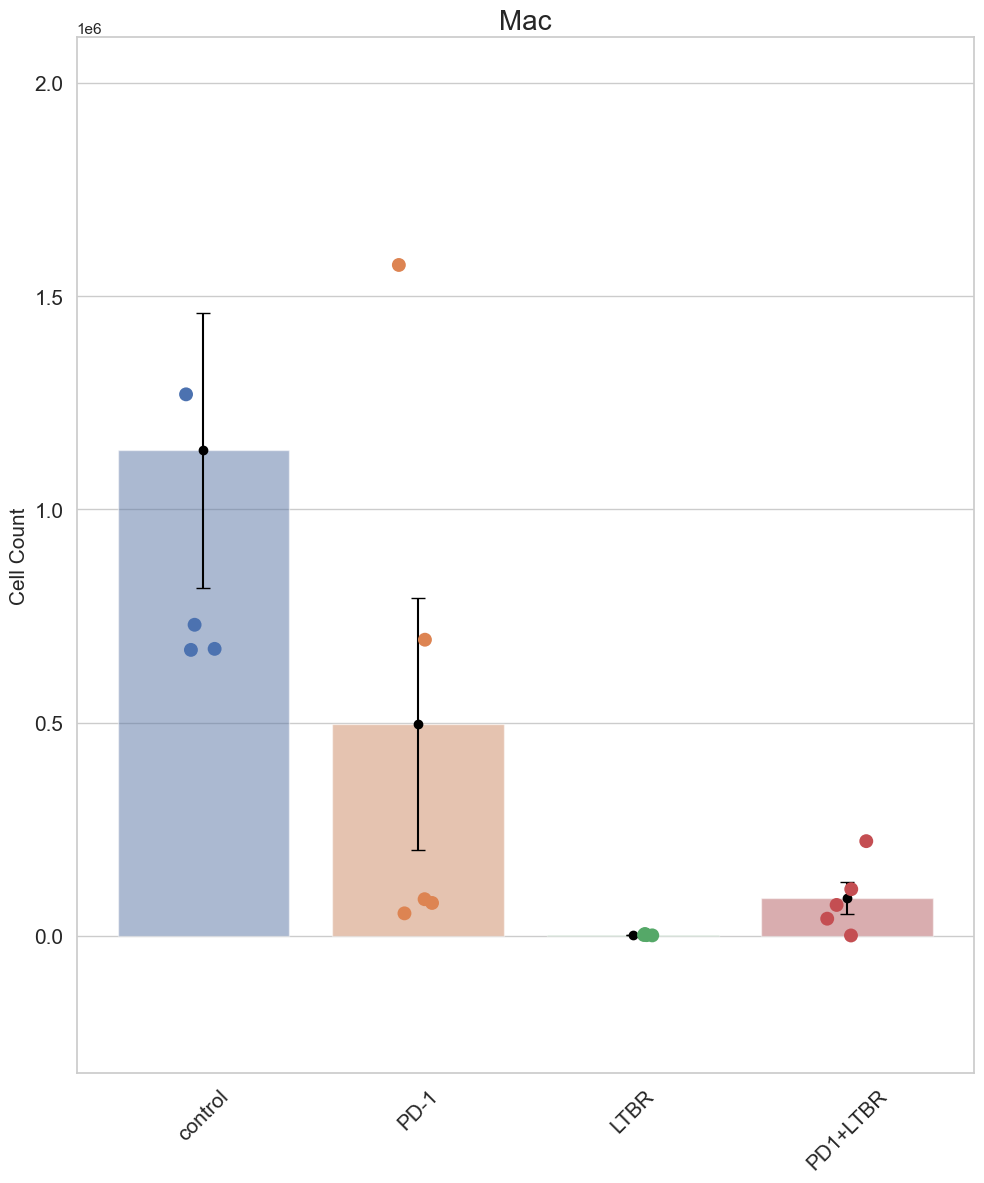

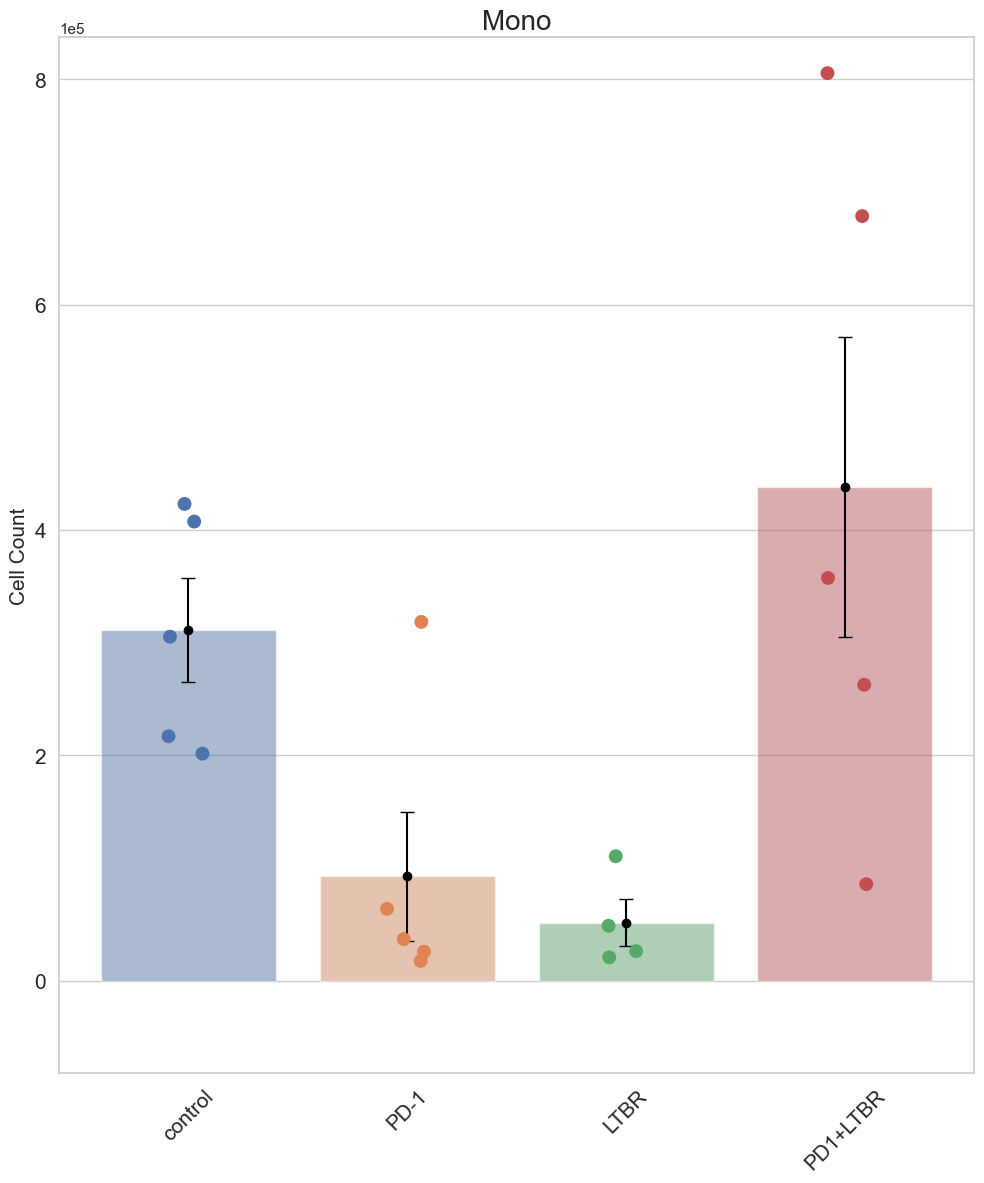

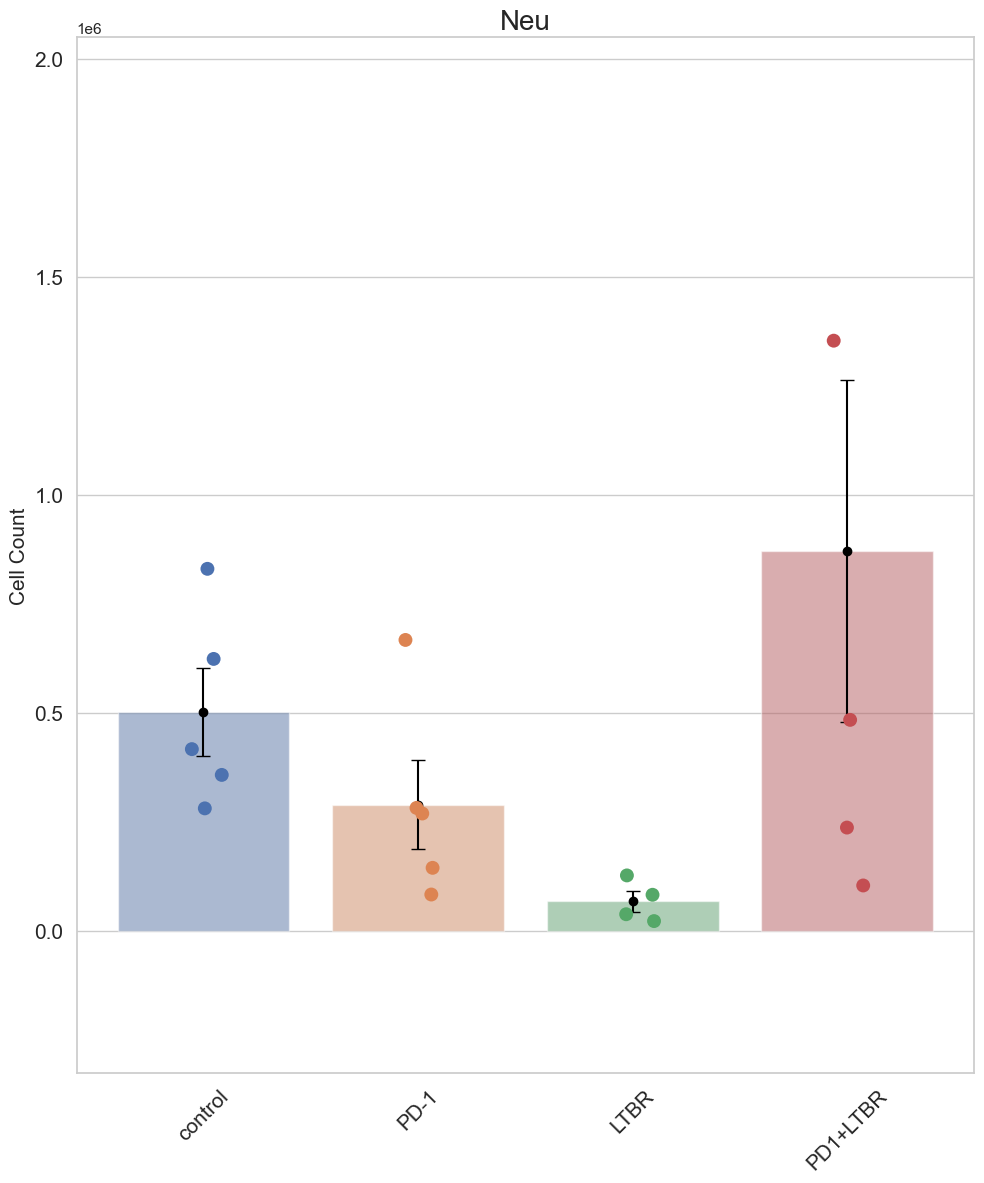

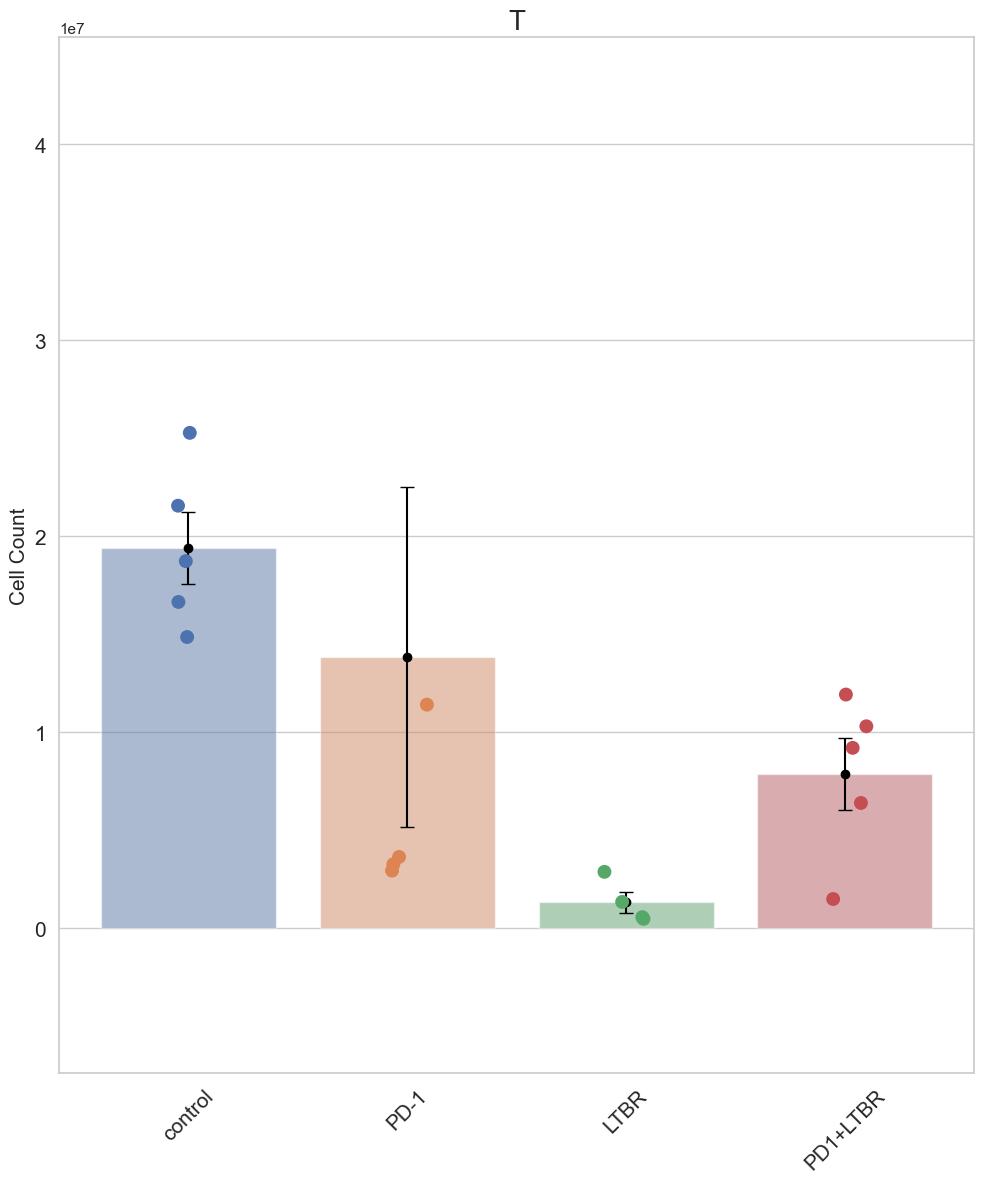

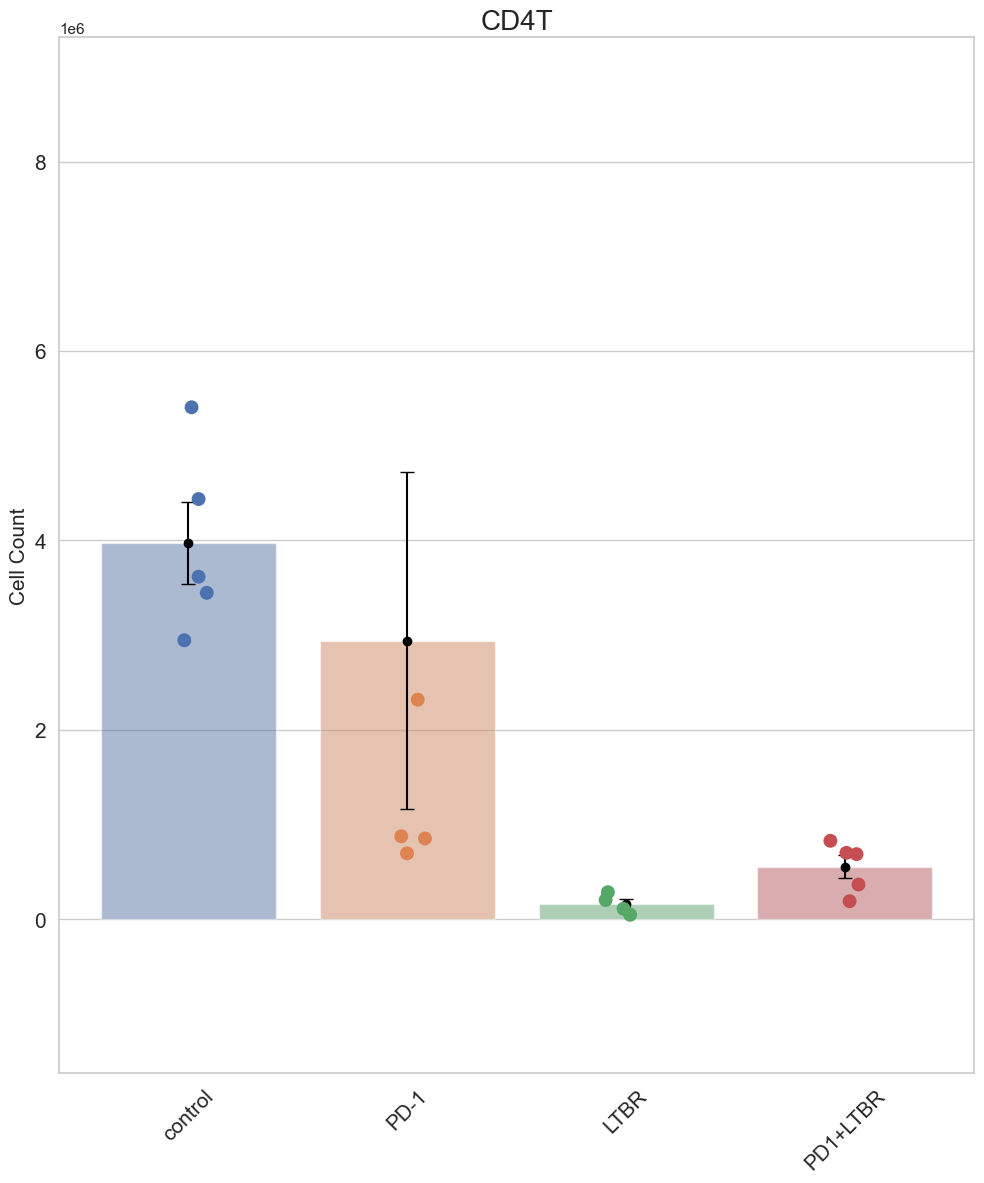

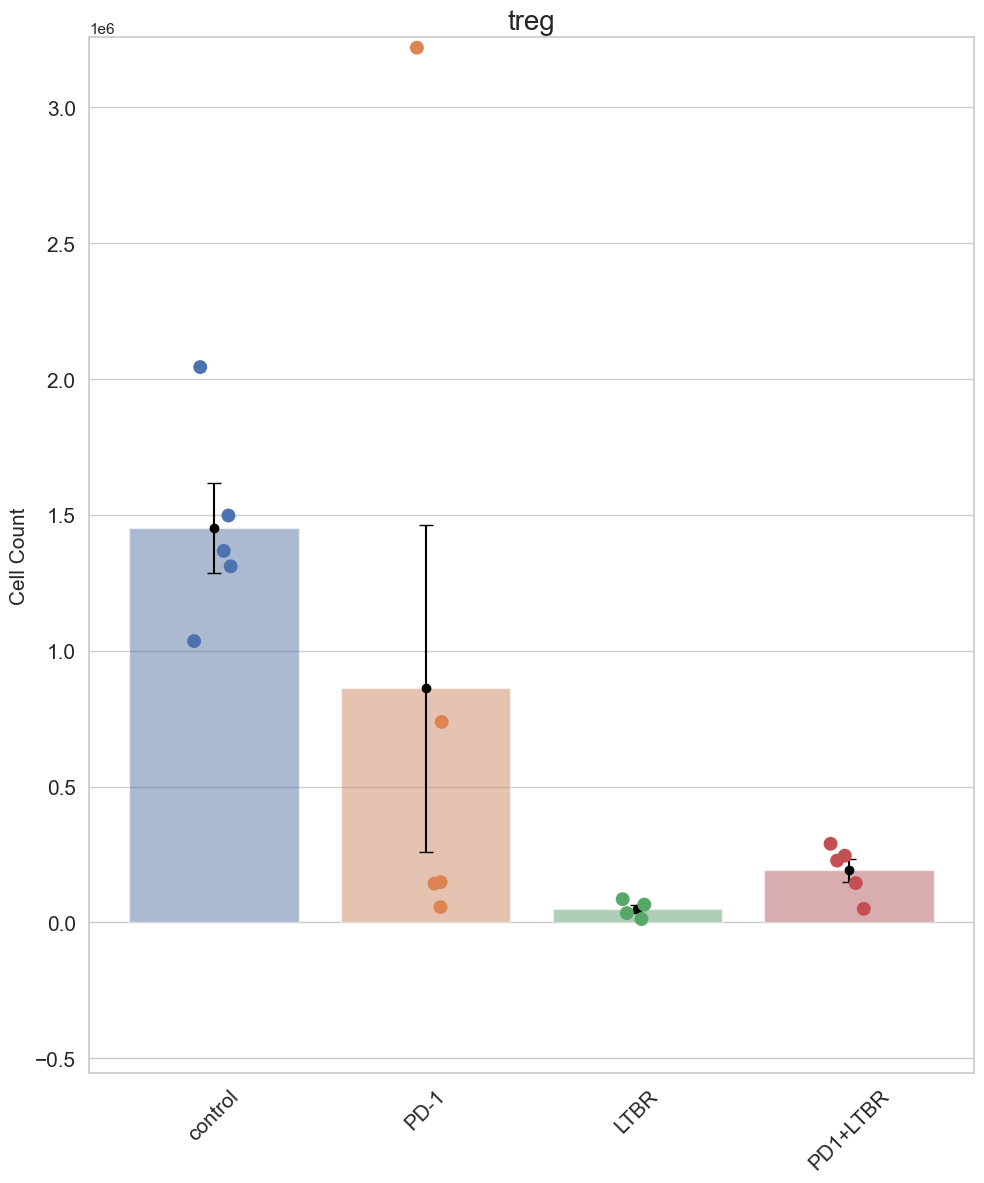

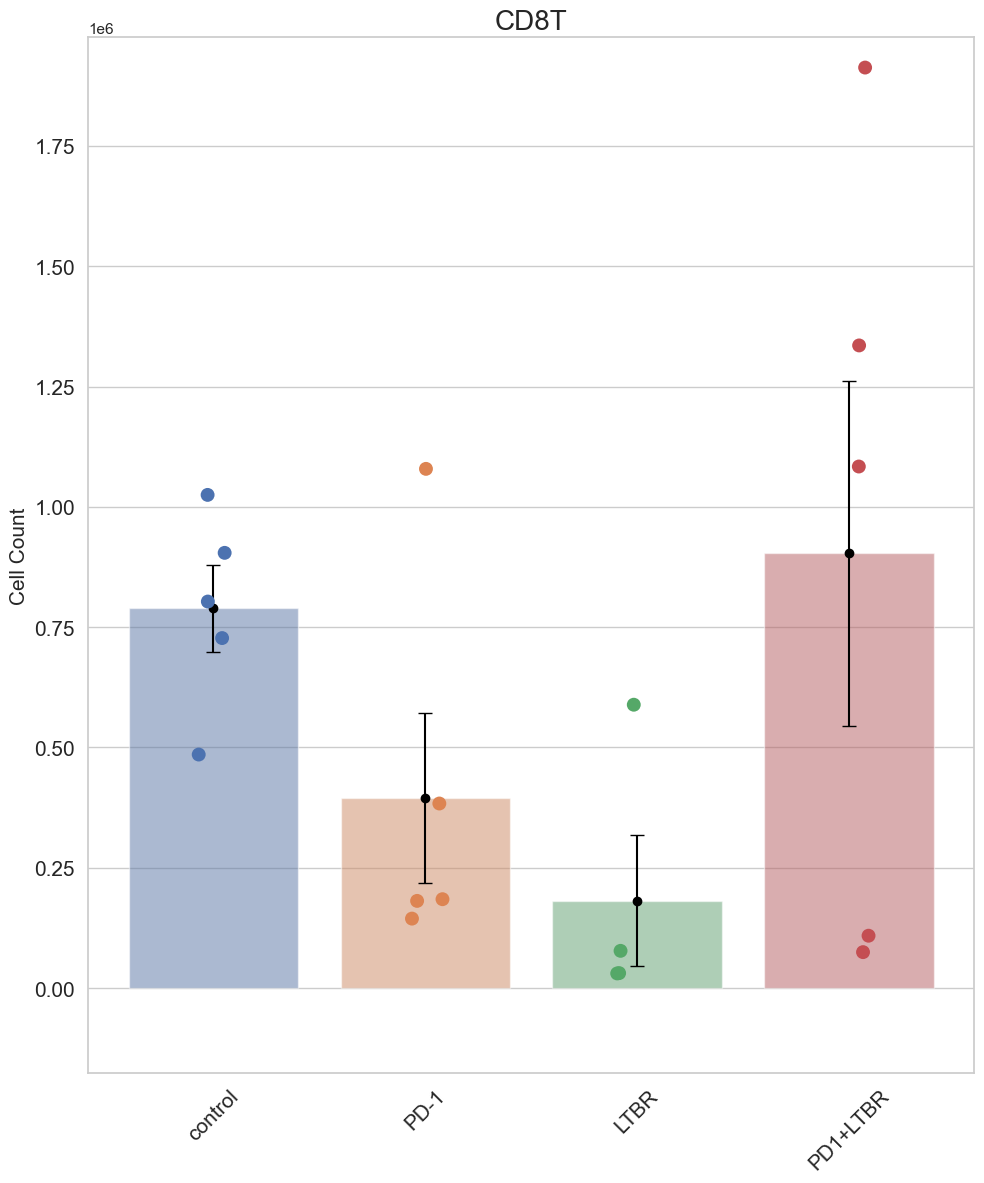

In [3]:
for column in cell_type:
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10,12)) 
    sns.barplot(x='Group', y=column, data=data, alpha=0.5, ci=None, order=groups)
    sns.stripplot(x='Group', y=column, data=data, jitter=True, order=groups, size=10, alpha=1)
    means = [data[data['Group'] == group][column].mean() for group in groups]
    errors = [data[data['Group'] == group][column].sem() for group in groups]
    plt.errorbar(x=range(len(groups)), y=means, yerr=errors, fmt='o', color='black', capsize=5)
    plt.ylabel('Cell Count', fontsize=15)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))# Change y-axis to scientific notation
    plt.tick_params(axis='y', labelsize=15)  # change y tick label font size
    plt.xticks(range(len(groups)), groups, fontsize=15, rotation=45)  # Rotate x-axis labels
    ymin = min(means)-max(errors) 
    ymax = max(means) + 3*max(errors)
    plt.ylim([ymin, ymax])
    plt.title(column, fontsize=20)
    plt.xlabel('')
    plt.tight_layout()
    fig_filename = os.path.join(dirname, f"{column}.png")  
    plt.savefig(fig_filename)
#     plt.savefig(column + '.png')

In [4]:
p_values = pd.DataFrame(columns=['Cell Type', 'Group 1', 'Group 2', 'p-value'])
for column in cell_type:
    for group1 in groups:
        for group2 in groups:
            if groups.index(group1) < groups.index(group2):
                f, p = f_oneway(data[data['Group'] == group1][column], data[data['Group'] == group2][column])
                p_values = p_values.append({'Cell Type': column, 'Group 1': group1, 'Group 2': group2, 'p-value': p}, ignore_index=True)
# p_values.to_excel('p_values.xlsx', index=False)
output_filepath = os.path.join(dirname, 'p_values.xlsx')  
p_values.to_excel(output_filepath , index=False)

/var/folders/56/k3j8nxjs0yb5sl_rjhv3gggh0000gn/T/ipykernel_90877/2296207544.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_values = p_values.append({'Cell Type': column, 'Group 1': group1, 'Group 2': group2, 'p-value': p}, ignore_index=True)
/var/folders/56/k3j8nxjs0yb5sl_rjhv3gggh0000gn/T/ipykernel_90877/2296207544.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_values = p_values.append({'Cell Type': column, 'Group 1': group1, 'Group 2': group2, 'p-value': p}, ignore_index=True)
/var/folders/56/k3j8nxjs0yb5sl_rjhv3gggh0000gn/T/ipykernel_90877/2296207544.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_values = p_values.append({'Cell Type': column, 'Group 1': group1, 'Group 2': group2, 'p-value': p}, ignor